# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_banco = pd.read_csv('previsao_de_renda.csv')
df_banco.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


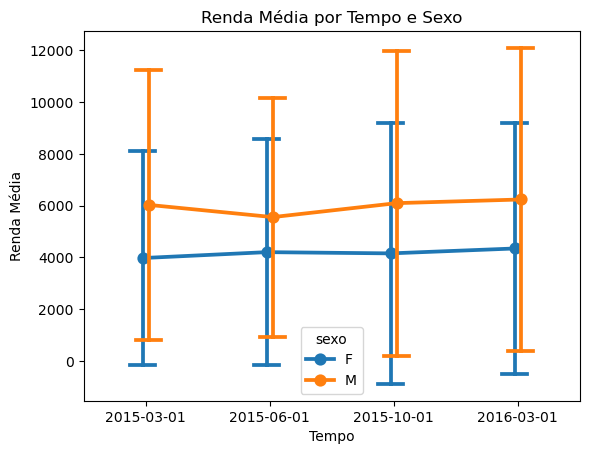

In [2]:
df_banco_2 = df_banco.loc[:,['data_ref','tempo_emprego', 'posse_de_veiculo', 'posse_de_imovel', 'sexo', 'renda']]

# Retirando dados amostrais da base
df_banco_2['data_ref'] = pd.to_datetime(df_banco_2['data_ref'])
df_banco_amostral = df_banco_2[
    (df_banco_2['data_ref'].dt.year.isin([2015,2016])) & 
    (df_banco_2['data_ref'].dt.month.isin([3,6,10]))
]

# Verificando disperção da média ao longo do tempo 

sns.pointplot(data=df_banco_amostral, x='data_ref', y='renda', hue='sexo', capsize=0.2, dodge=True, errorbar='sd') # errorbar='sd' calcula o desvio padrão automaticamente
plt.title("Renda Média por Tempo e Sexo")
plt.xlabel("Tempo")
plt.ylabel("Renda Média")
plt.show()

Analisando a amostra de 3 meses, não houve uma alta variação nos dados, demostrando estabilidade ao decorrer do tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

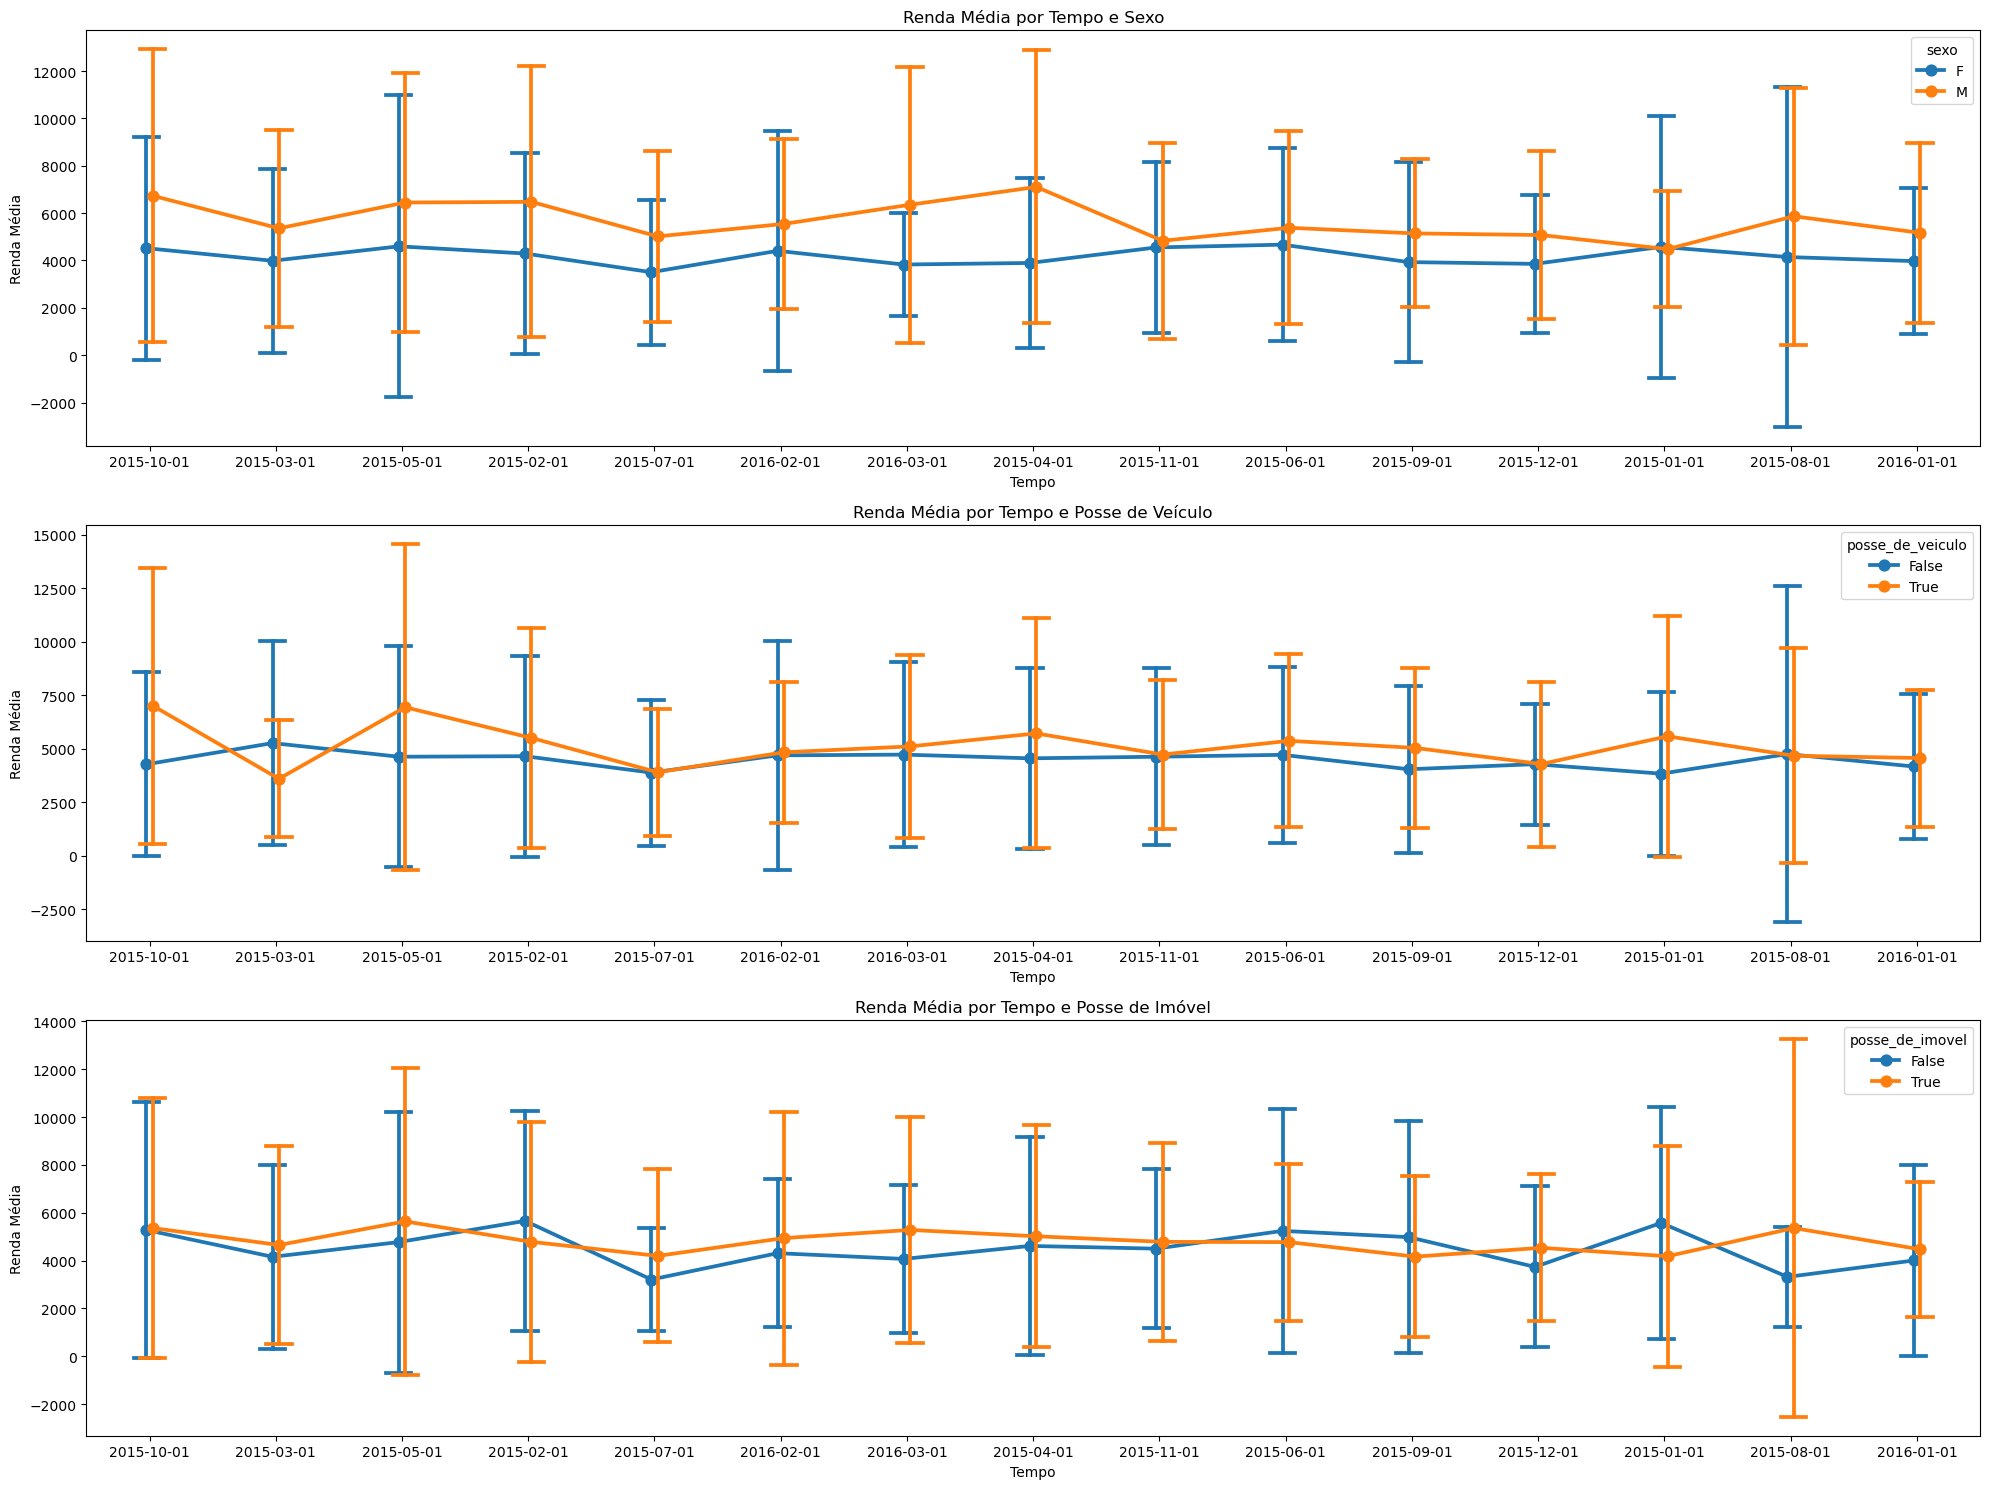

In [36]:
# Criando a amostra de 10% dos dados
df_banco_amostra = df_banco_2.sample(frac=0.1, replace=False)

# Criando os subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 15))  # 3 linhas, 1 coluna, tamanho ajustado

# Gráfico 1: Renda Média por Tempo e Sexo
sns.pointplot(
    data=df_banco_amostra, x='data_ref', y='renda', hue='sexo',
    capsize=0.2, dodge=True, errorbar='sd', ax=axes[0]
)
axes[0].set_title("Renda Média por Tempo e Sexo")
axes[0].set_xlabel("Tempo")
axes[0].set_ylabel("Renda Média")

# Gráfico 2: Renda Média por Tempo e Posse de Veículo
sns.pointplot(
    data=df_banco_amostra, x='data_ref', y='renda', hue='posse_de_veiculo',
    capsize=0.2, dodge=True, errorbar='sd', ax=axes[1]
)
axes[1].set_title("Renda Média por Tempo e Posse de Veículo")
axes[1].set_xlabel("Tempo")
axes[1].set_ylabel("Renda Média")

# Gráfico 3: Renda Média por Tempo e Posse de Imóvel
sns.pointplot(
    data=df_banco_amostra, x='data_ref', y='renda', hue='posse_de_imovel',
    capsize=0.2, dodge=True, errorbar='sd', ax=axes[2]
)
axes[2].set_title("Renda Média por Tempo e Posse de Imóvel")
axes[2].set_xlabel("Tempo")
axes[2].set_ylabel("Renda Média")

# Ajustando os layouts
plt.tight_layout()
plt.show()


Podemos ver que nessa amostragem os dados variam e tem uma baixa estabilidade comparada ao conjuto inteiro da base. Em geral o tempo de emprego transmite uma alta estabilidade ao decorrer do tempo, denotando uma variavel mais estavel para uma regressão linear. 